### This script shows how to use the existing code in opengrid to create a water consumption benchmark. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from opengrid import config
c = config.Config()

%matplotlib inline
plt.rcParams['figure.figsize'] = 16,8

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from opengrid.library.houseprint import houseprint

# Load the Houseprint and sync all data

In [3]:
hp = houseprint.Houseprint()

Opening connection to Houseprint sheet
Opening spreadsheets
Parsing spreadsheets
24 Sites created
24 Devices created
75 sensors created
Houseprint parsing complete


In [4]:
hp.sync_tmpos()

OperationalError: database is locked

# Create a dataframe containing a column for each water sensor with data of exactly one year (up till now)

In [16]:
df = hp.get_data(sensortype='water', head=pd.Timestamp('now') - pd.Timedelta(days=365))
#retain only positive values (sometimes there are meter resets)
df = df[df > 0]

# Plot results

## Plot timeseries and load duration for each retained sensor

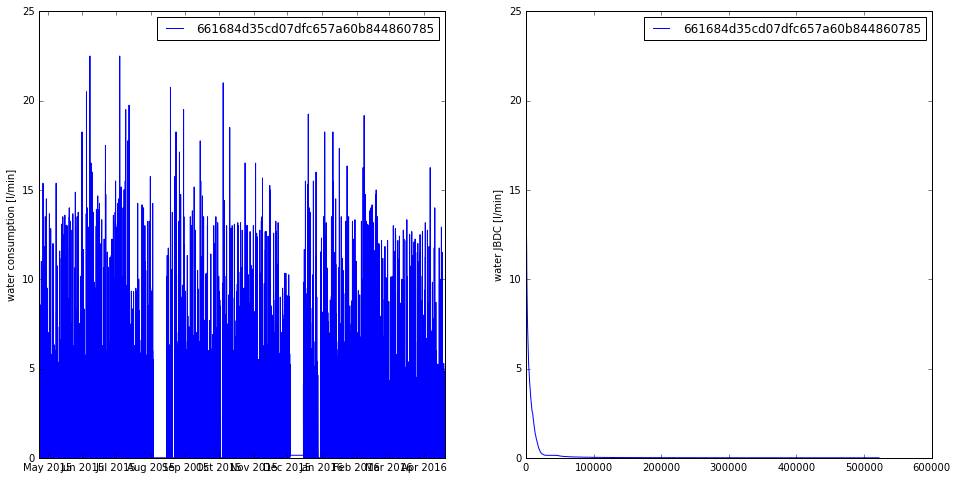

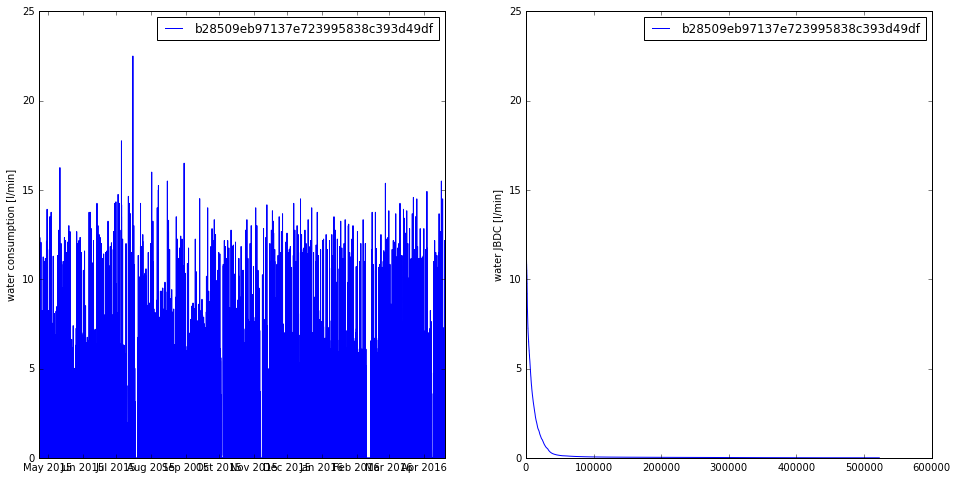

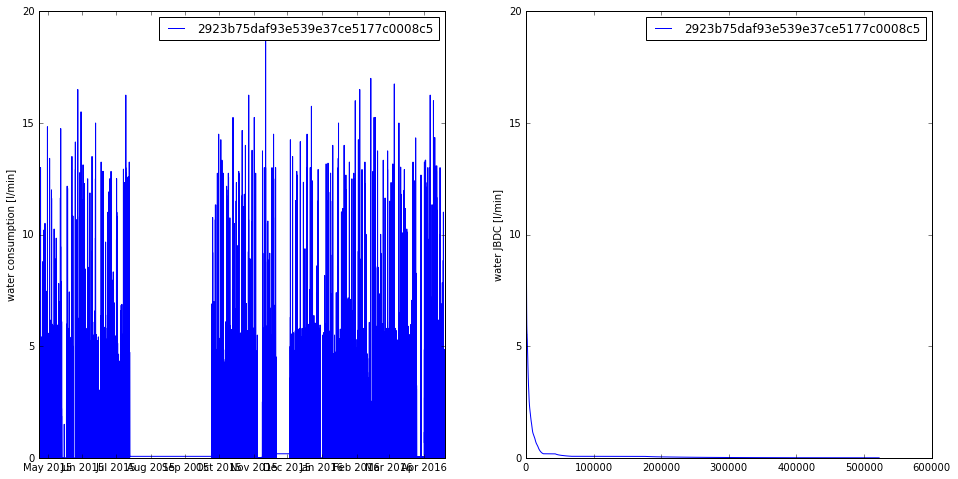

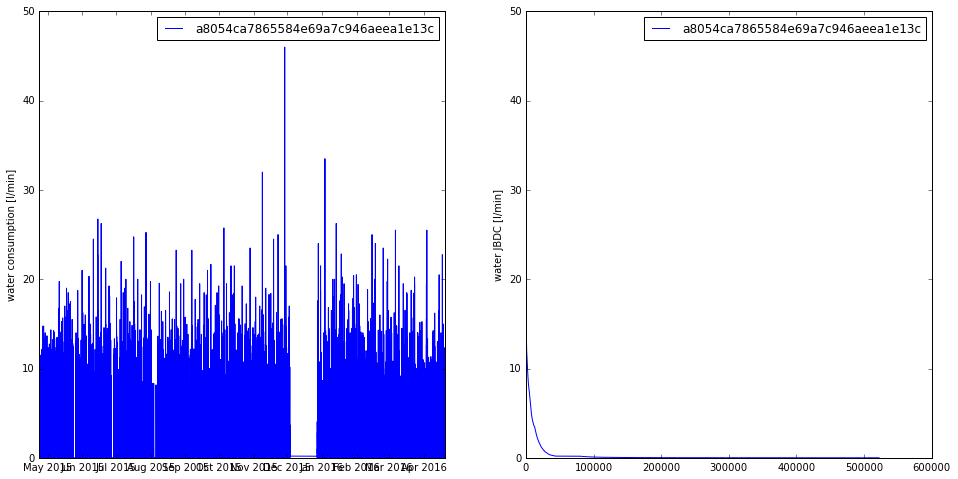

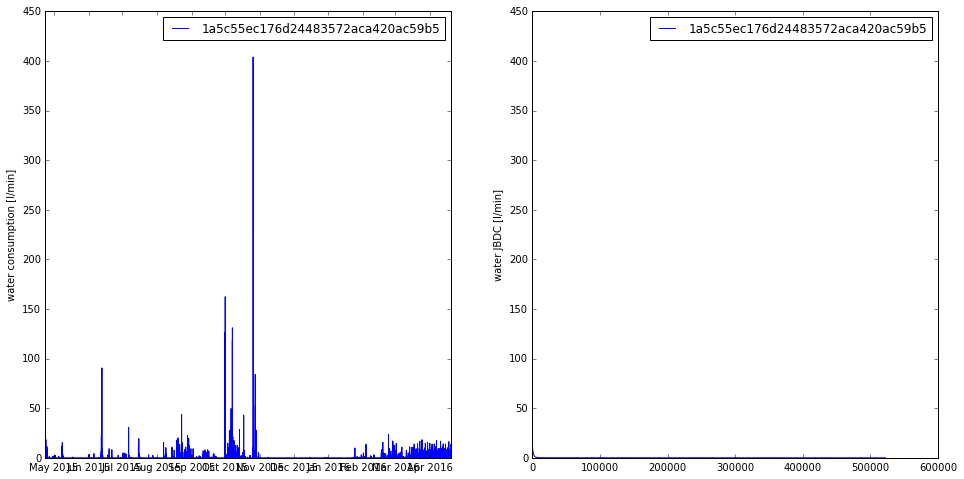

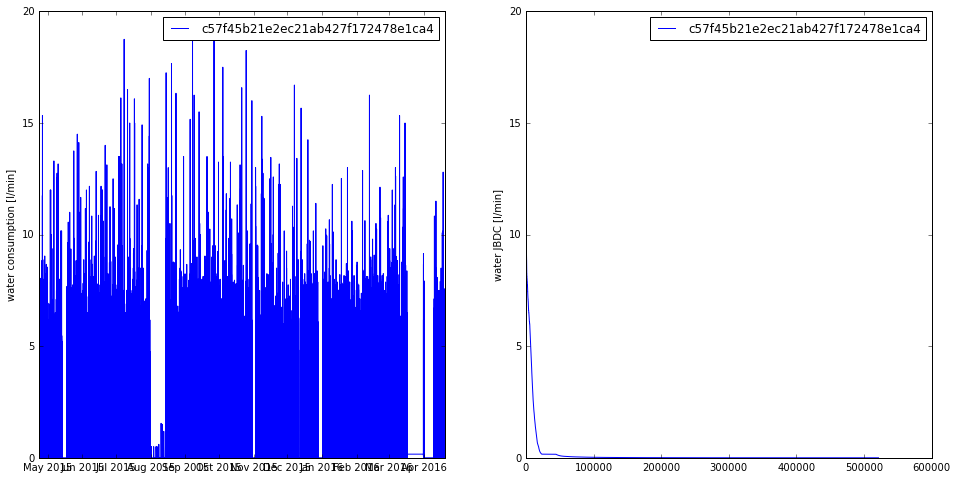

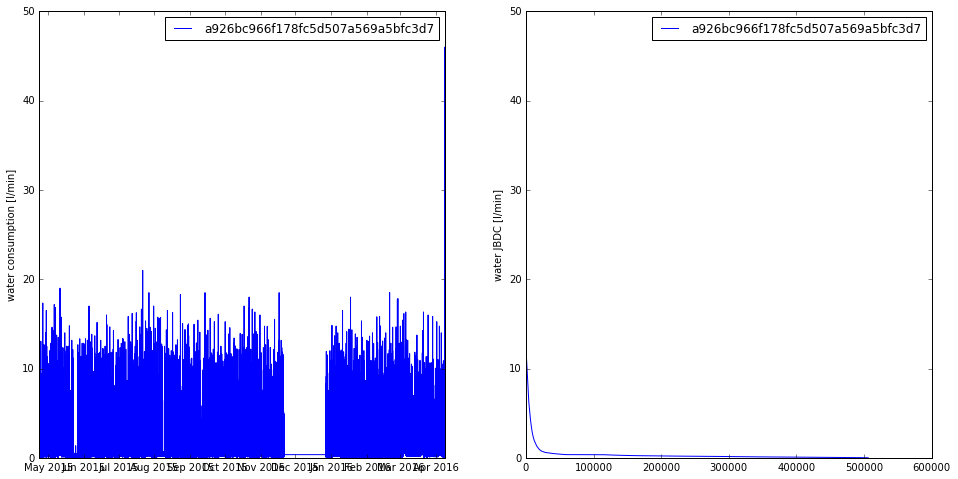

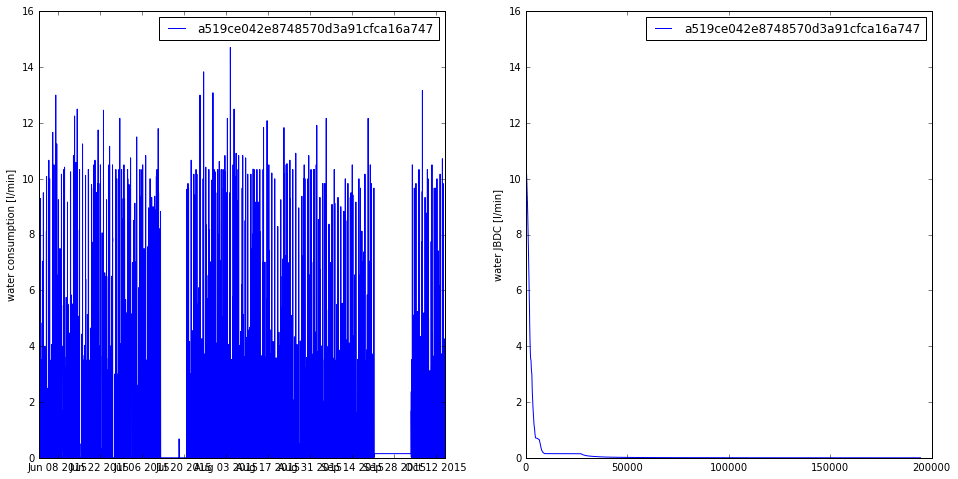

In [17]:
for sensor in df.columns:
    plt.figure()
    ts = df[sensor].dropna()
    ax1=plt.subplot(121)
    plt.plot_date(ts.index, ts, '-', label=sensor)
    plt.ylabel('water consumption [l/min]')
    plt.legend()
    
    ax2=plt.subplot(122)
    plt.plot(np.sort(ts)[::-1], label=sensor)
    plt.ylabel('water JBDC [l/min]')
    plt.legend()

## Let's refine the load duration into a histogram

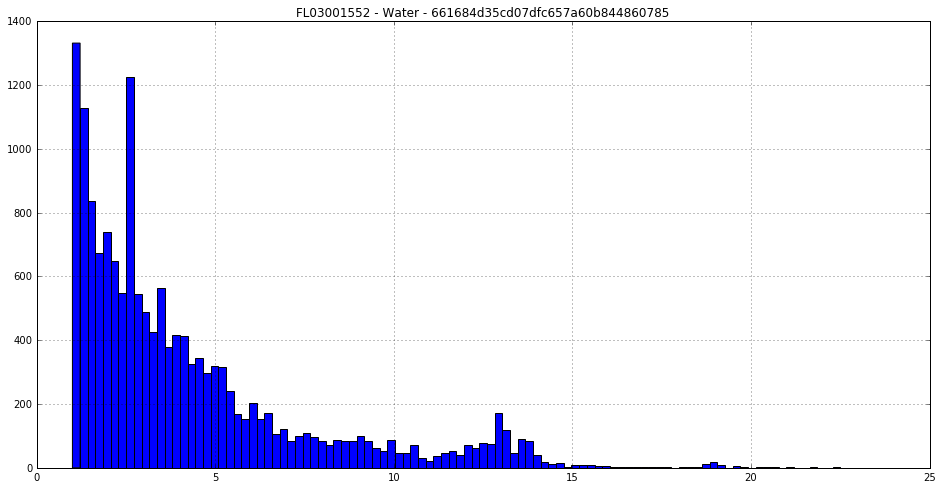

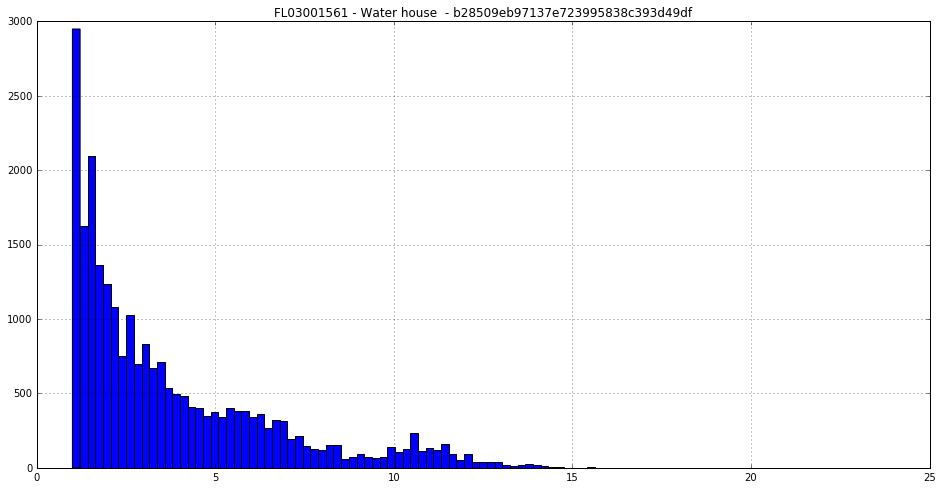

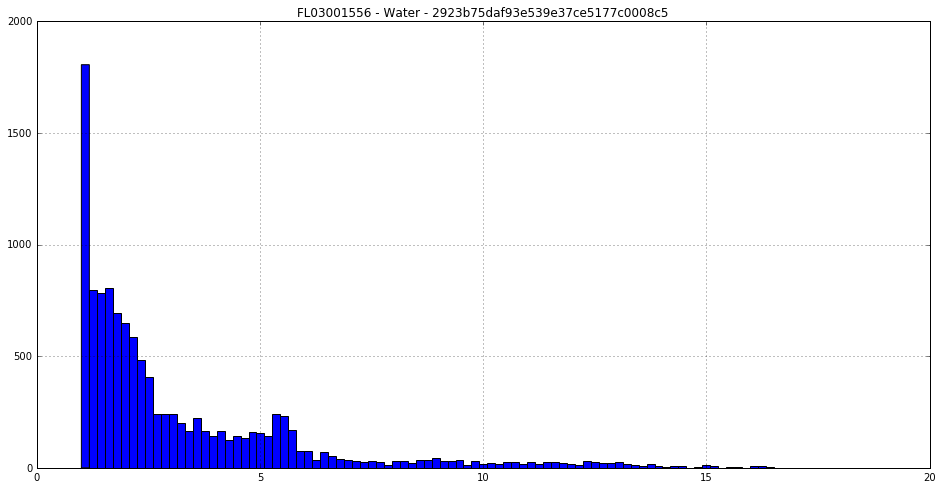

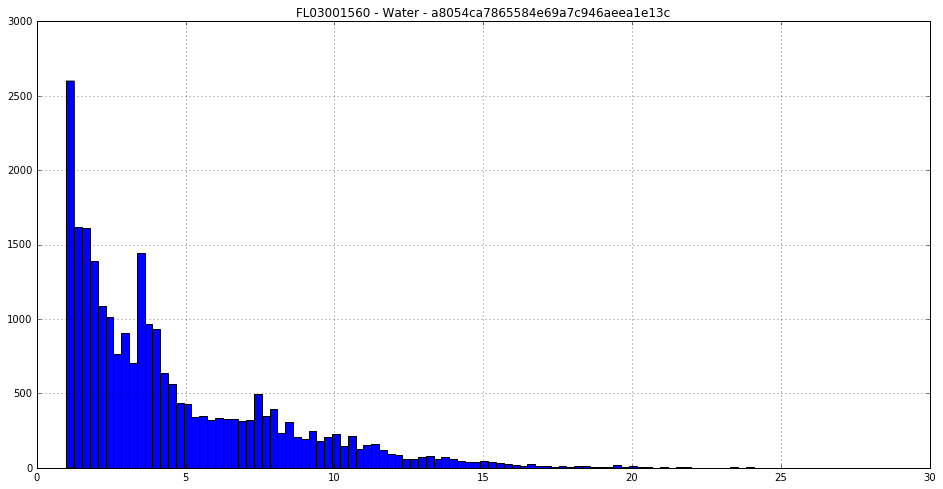

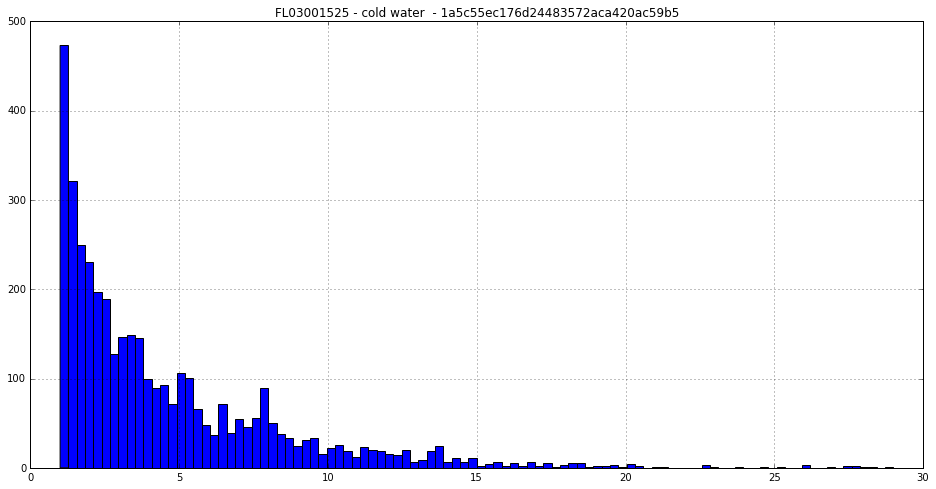

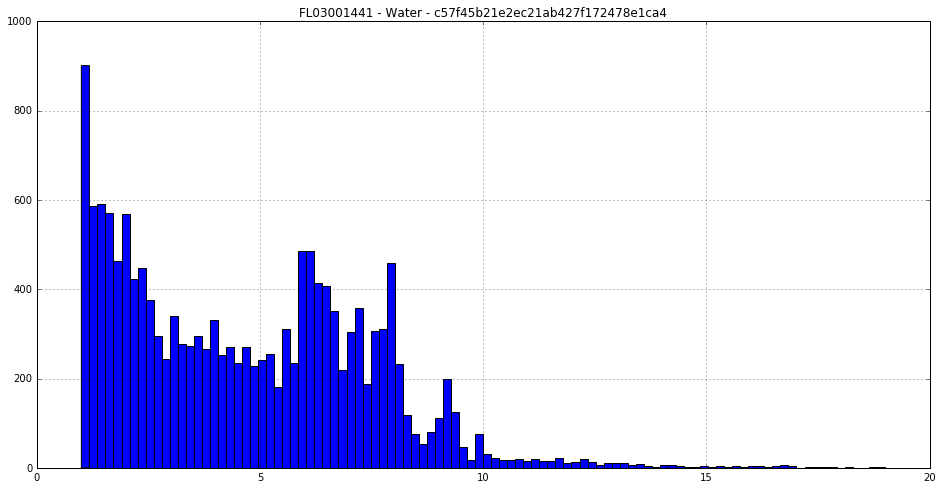

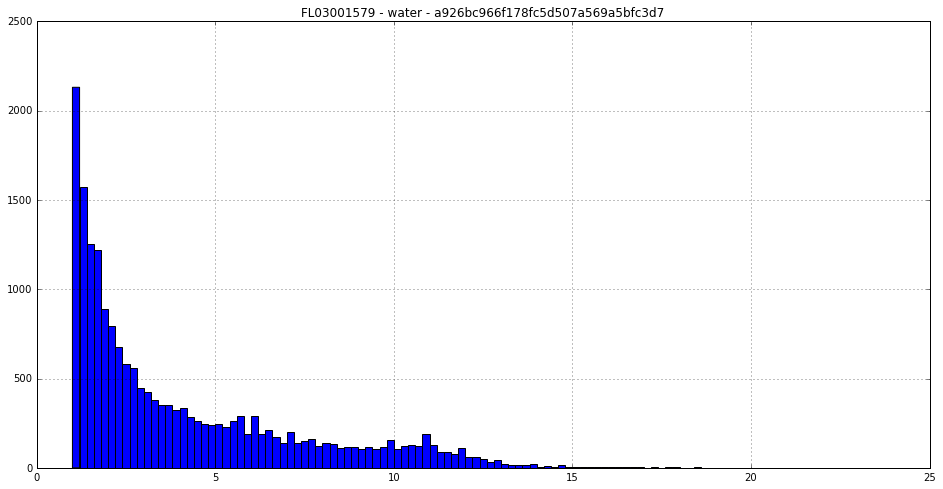

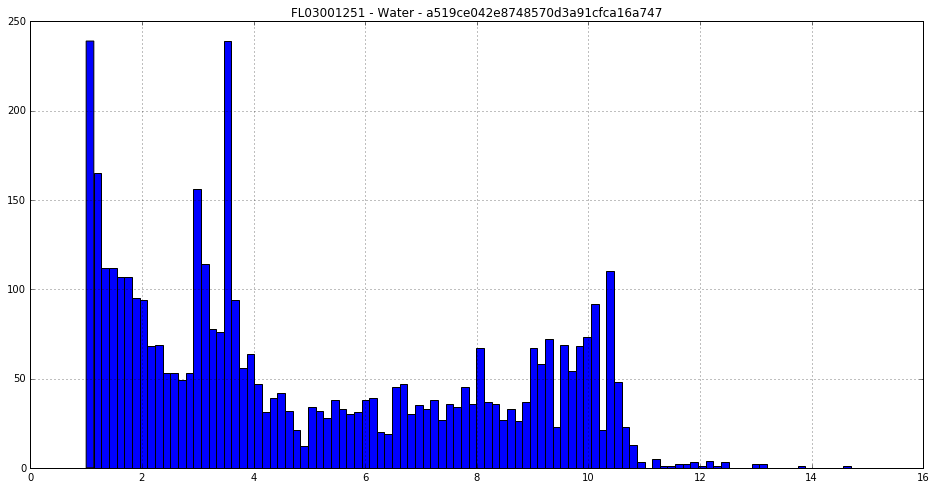

In [20]:
for sensor in df.columns:
    plt.figure()
    ts = df[sensor]
    ts=ts[ts>1]
    ts=ts[ts<30]
    ts.hist(bins=100)
    plt.title(hp.find_sensor(sensor).device.key + ' - ' + hp.find_sensor(sensor).description + ' - ' + sensor)

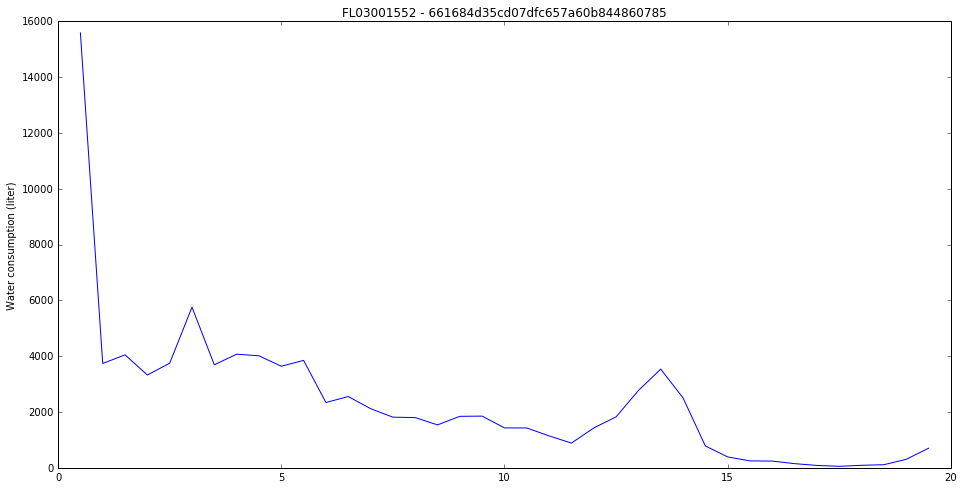

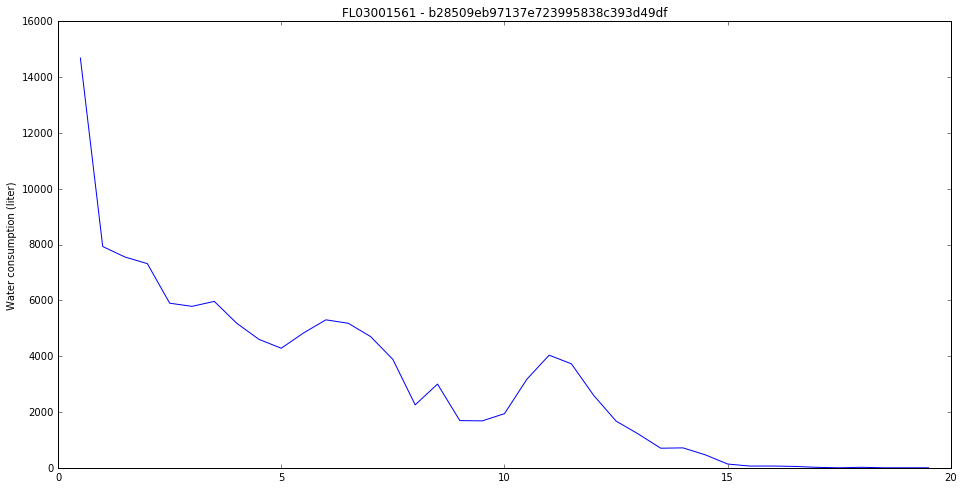

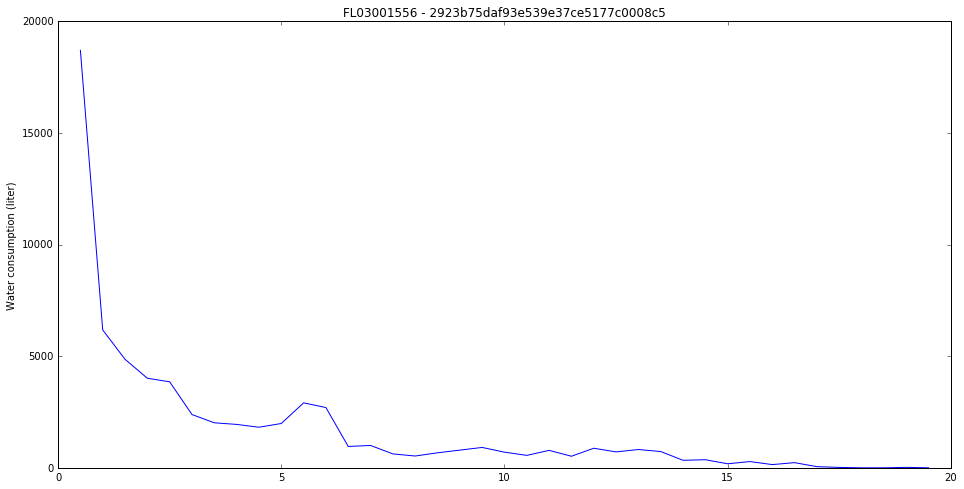

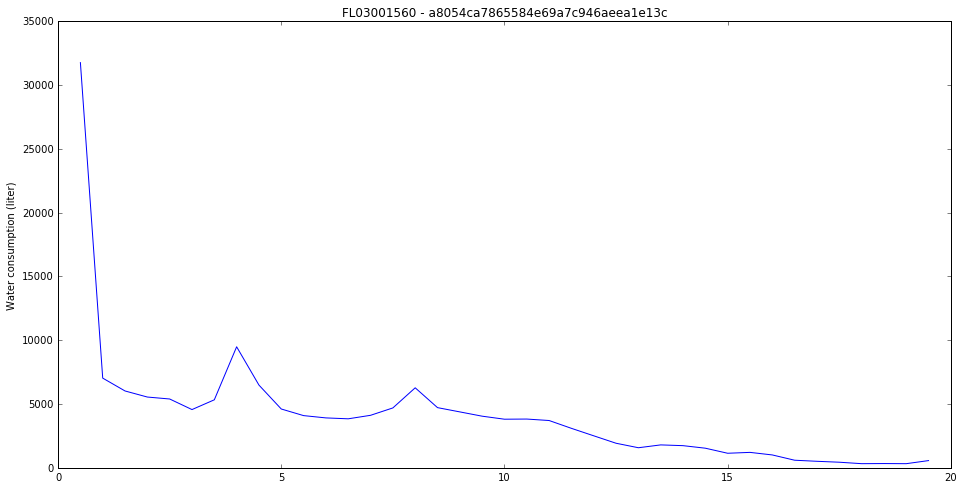

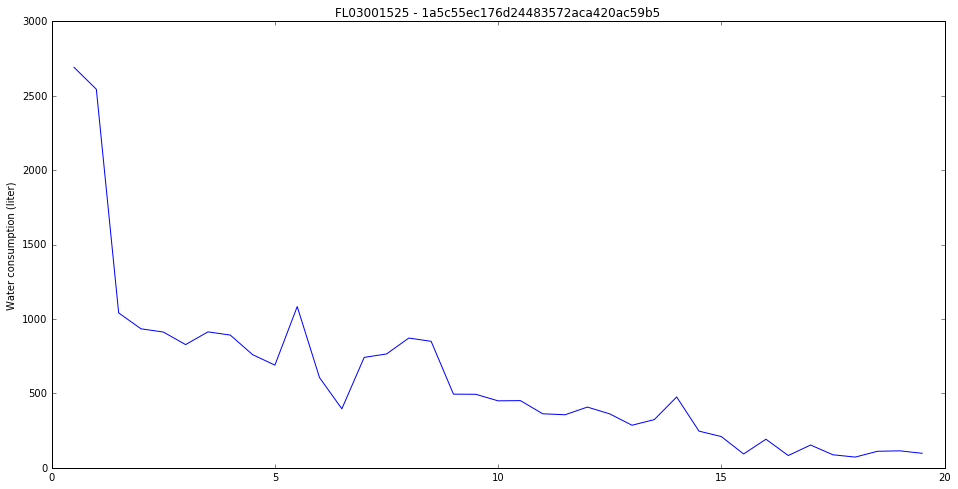

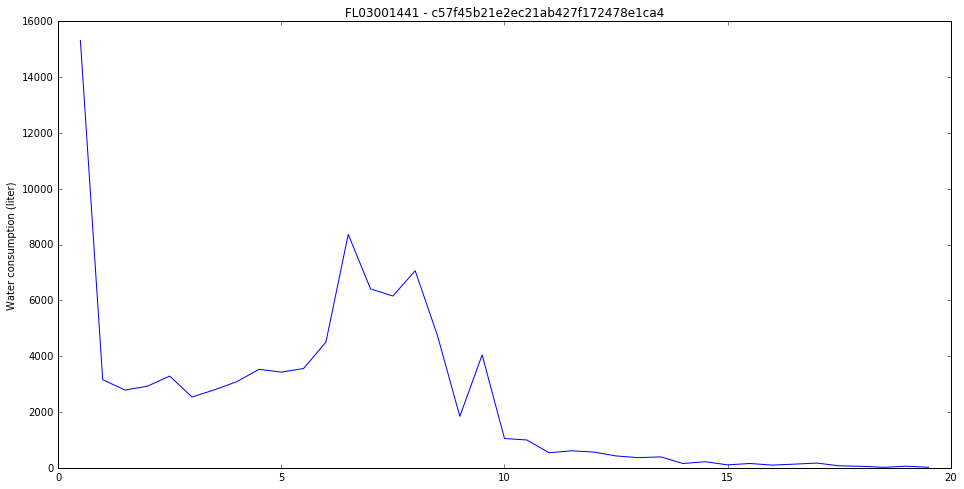

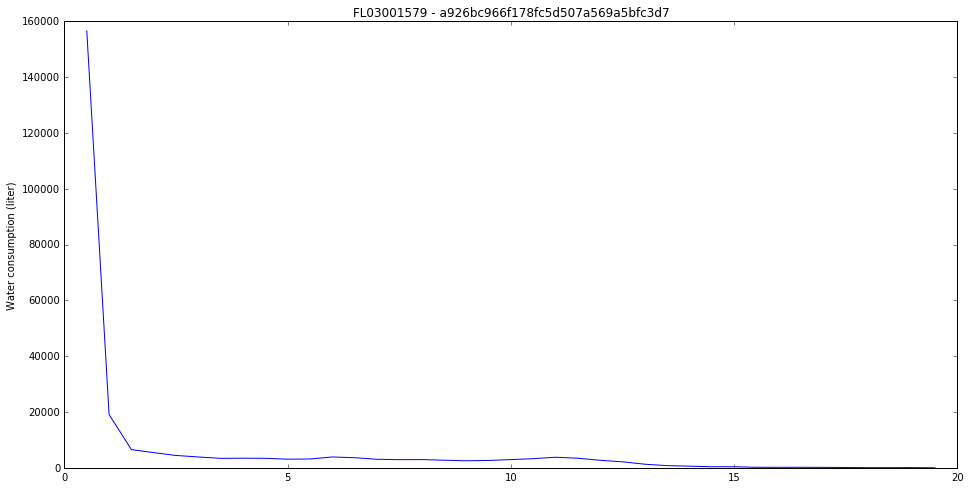

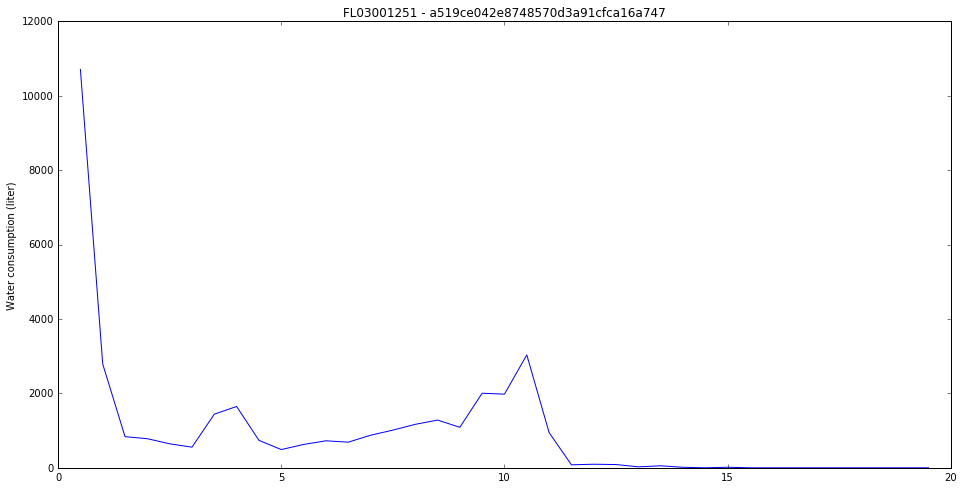

In [19]:
for sensor in df.columns:
        
    plt.figure()
    ts = df[sensor]
    ts=ts[ts>0.1]
    ts=ts[ts<30]
    
    hst, edges = np.histogram(ts, np.arange(0,20,0.5))
    hst_weighted = hst * edges[1:]
    plt.plot(np.arange(0,20,0.5)[1:], hst_weighted)
    #plt.plot(np.arange(0,20,0.25)[1:], hst)
    plt.title(hp.find_sensor(sensor).device.key + ' - ' + sensor)
    plt.ylabel('Water consumption (liter)')
    